# Normal Dağılım Serisinin İncelenmesi 

## 1.Normal Dağılım 

Normal dağılım, Gaussian dağılımı ya da çan eğrisi (bell curve) olarak da bilinir. Bu konu istatistiğin merkezinde yer aldığı için veri biliminin bel kemiği sayılabilir. Bir veri seti ile karşılaştığımızda öncelikli olarak değişkenlerin olasılıksal dağılımlarını bulmaya çalışırız. Bunu yaparken genel olarak normal dağılıp dağılmadığına dikkat ederiz.

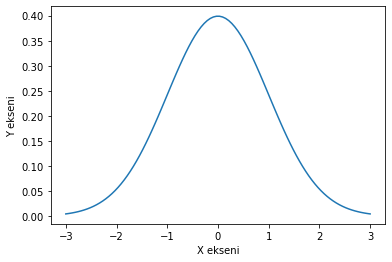

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3 * sigma, 
                mu + 3 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("X ekseni")
plt.ylabel("Y ekseni")
plt.show()

Normal dağılımı niteleyen iki parametre vardır. Bunlar ortalama ve standart sapmadır. Normal dağılımın bu nitelikleri onu istatistikçiler için son derece basit hale getirir ve bu nedenle normal dağılım gösteren herhangi bir değişkenin daha yüksek doğrulukta tahmin edilmesini mümkün kılar. Esasen, modelin anlaşılırlığını basitleştirmeye yardımcı olabilir.

Normal dağılımla ilgili iki tür basit açıklama mevcuttur:

1. Normal bir dağılımın öncülleri ortalama, mod ve medyan tarafından betimlenir. Bir değişkene ait bu değerler eğer ki birbirine eşit veya yakın ise orada bir normal dağılımdan bahsedebiliriz.

2. Sadece ortalama ve standart sapmayı kullanarak dağılım hakkında bilgi sahibi olabilirsiniz.

---

### 2.Normal Dağılımın Görselleştirilmesi ve Yorumlanması
---
* Bu alanda github üzerinden örnek bir veri seti alınmıtır. Veri setinin betimsel istatistikselleri yorumlanmış ve 
    * Histogram (Çubuk Grafik)
    * Box Plot (Kutu Grafiği)
    * Kernel Density Estimation (KDE)
    * Q-Q Plot
    * Violin Plot
    
yöntemleri değişkenler normal dağılım üzerinden görselleştirilip, görseller hankkın genel bir yorum yapılmıştır. 

---

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
# veriye github üzerinden erişelim 

url = "https://github.com/yigitsener/machine-learning/blob/master/data/lessons.csv"

df = pd.read_csv(url + "?raw=True", error_bad_lines= False)

In [4]:
df.head()

,Maths,English,History
0,67.970442,60.990250,72.200954
1,58.438226,64.157607,62.687182
2,82.354172,62.998874,50.171015
3,72.909983,64.255032,62.686110
4,81.140560,64.819401,57.546319


In [6]:
# kolon isimlerini türkçeleştirelim 

df = df.rename (columns = {"Maths" : "Matematik",
                           "English" : "İngilizce", 
                           "History": "Tarih"})

In [7]:
df.head()

,Matematik,İngilizce,Tarih
0,67.970442,60.990250,72.200954
1,58.438226,64.157607,62.687182
2,82.354172,62.998874,50.171015
3,72.909983,64.255032,62.686110
4,81.140560,64.819401,57.546319


In [8]:
df.shape

(100, 3)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Matematik,100.0,70.260026,8.490178,50.592003,64.705280,70.277253,76.986152,89.627868
İngilizce,100.0,62.564380,1.813402,60.160859,61.284863,62.167855,63.591046,67.829394
Tarih,100.0,62.306433,17.354135,4.592358,53.810693,64.672982,74.121710,86.833889


**Yukarıdaki betimleyici istatistikten yola çıkarak aşağıdaki varsayımlara ulaşabiliriz.**
* Matematik dersi için öğrencilerin notlarının ortalaması ile medyanı (%50 yazan yer) birbirine yakın görüldüğü için en başta manidar bir normal dağılıma delalet olduğu söylenebilir. Üç standart sapma değeri (std = 8,49) için 8,49 * 3 =**25,47** için matematik notlarının dağılımı **44 (70,26 - 25,47)** ile **95 (70,26 + 25,47)** arasında yer almaktadır (_Değerler, ortalama değere 3 standart sapma çıkartma ve ekleme ile bulundu_). Minimum (50) ve maksimum (89) değerleri (44 < X < 95) bu aralık içinde yer aldığından outlier olasılığından düşmektedir. Burada standart sapmada alınan değer bakılan değişkene göre farklılık gösterebilir. Örneğin bu değişken için standart sapmayı 2 alsaydık eğer maksimum değerler için outlier varsayımında bulunabilirdik.


* İngilizce dersinin ortalama (62,56) ve medyanı (62,17) birbirine oldukça yakın görünüyor. Ancak Matematikteki 3 standart sapmayı kabul edip incelediğimizde; 1,81 * 3 = 5,43 ile normal dağılım aralığını 57 ve 67 arasında bulmaktayız. Bu durumda maksimum verilerde outlier söz konusu olabilmektedir.


* Tarih dersini incelediğimizde ise daha geniş bir aralık (range) ile karşı karşıya olduğumuzu standart sapmanın 17 olduğundan anlayabiliriz. Bu ders içinde standart sapmayı 3 olarak kabul ettiğimizde ise minimum değerlerde bir outlier söz konusu olabilmektedir.

---

### a. Histogram (Çubuk Grafik)

Histogram, hızlı ve çabuk bir şekilde bir değişkenin dağılımı hakkında fikir sahibi olunmasını sağlar. Sürekli sayısal değişken için geçerli olan histogram, sayıların belli gruplara bölünerek gösterimini sağlar. Bu yöntemin adı BINS’dir. Bins metodu kısacası frekansa göre sayısal verileri gruplara böler. Aşağıdaki ilk ve ikinci örnekte Matematik değişkeni için farklı bins kullanılarak histogram oluşturulmuştur.
BINS = 10 için histogram oluşturalım ve dağılıma göre en uygun çan eğrisini (bell curve) çizdirerek değerlendirelim.

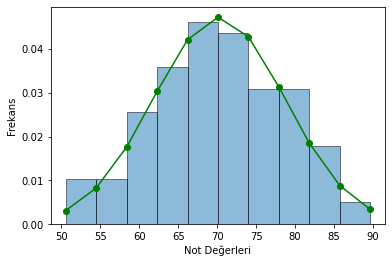

In [11]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(df.Matematik, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'black' )
# Bins -> Bidon olarak geçmekte ve 10 ayrı parcaya bolunmesini sağlar
# density -> yogunluk olarak gecmektedir. 
# Çan eğrisi için en uygun değerler

mu, sigma = stats.norm.fit(df.Matematik)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Not Değerleri")
plt.ylabel("Frekans")
plt.show()

Yukarıdaki histogramda görüldüğü üzere bins = 10 için 10 ayrı parçaya bölerek frekans yoğunluğunu göstermiştir. Ayrıca çağ eğrisi çizdirerek histogramın dağılımını gözlemlemek daha kolay bir hale gelmiştir.

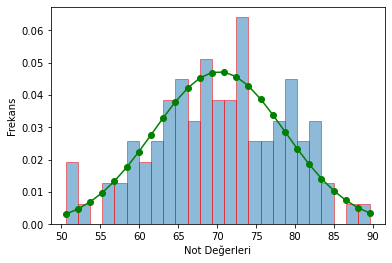

In [23]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(df.Matematik, bins = 25,
                      density = 1, alpha = 0.5,
                      ec= 'red' )
# Bins -> Bidon olarak geçmekte ve 10 ayrı parcaya bolunmesini sağlar
# density -> yogunluk olarak gecmektedir. 
# Çan eğrisi için en uygun değerler

mu, sigma = stats.norm.fit(df.Matematik)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Not Değerleri")
plt.ylabel("Frekans")
plt.show()

**İngilizce ve Tarih derleri içinde aynı işlemi gerçekleştirelim**

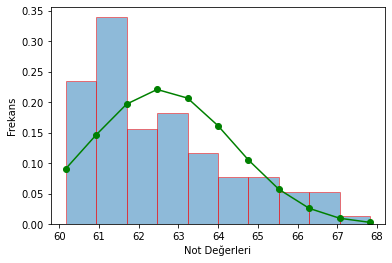

In [25]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(df.İngilizce, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'red' )
# Bins -> Bidon olarak geçmekte ve 10 ayrı parcaya bolunmesini sağlar
# density -> yogunluk olarak gecmektedir. 
# Çan eğrisi için en uygun değerler

mu, sigma = stats.norm.fit(df.İngilizce)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Not Değerleri")
plt.ylabel("Frekans")
plt.show()

Grafikte görüldüğü üzere İngilizce dersi için bir normallikten söz edemeyiz. Sağdan çarpıklık durumu (Right Skewed Distribution) görülmektedir.

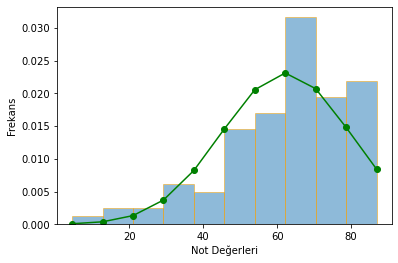

In [38]:
#Tarih için 

# Histogram plot parametreleri
_, bins, _ = plt.hist(df.Tarih, bins = 10,
                      density = 1, alpha = 0.5,
                      ec= 'orange' )
# Bins -> Bidon olarak geçmekte ve 10 ayrı parcaya bolunmesini sağlar
# density -> yogunluk olarak gecmektedir. 
# Çan eğrisi için en uygun değerler

mu, sigma = stats.norm.fit(df.Tarih)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Not Değerleri")
plt.ylabel("Frekans")
plt.show()

Tarih dersi için İngilizcede olan durumun tam tersi geçerli olup soldan bir çarpıklık (Left Skewed Distribution ) söz konusudur.


----

### b. Box Plot (Kutu Grafiği)

Box plot, beş rakamlı bir özete (“minimum”, birinci çeyrek (Q1), medyan, üçüncü çeyrek (Q3) ve “maksimum”) dayalı olarak verilerin dağılımını göstermenin standart bir yoludur.

* Medyan (%50 quartile): Değişkene ait verilerin ortasında yer alan değer.

* İlk Quartile (%25): Kısacası medyan ile minimumun ortasındaki değer olarak açıklanabilir.

* Üçüncü Quartile (%75): Medyan ile maksimumum ortasındaki değer olarak açıklanabilir.

* interquartile range (IQR): ilk ve üçüncü quartile arasında yer alan değerler bu aralığa girmektedir.

* Maksimum: Üçüncü quartile + IQR * 1,5 = bize maksimumdeğerini verir.

* Minimum: İlk quartile - IQR * 1,5 = bize minimum değerini verir.

* Outliers: Hesaplanan minimum ve maksimum değerlerin dışında kalan veriler outlier olarak nitelendirilir.

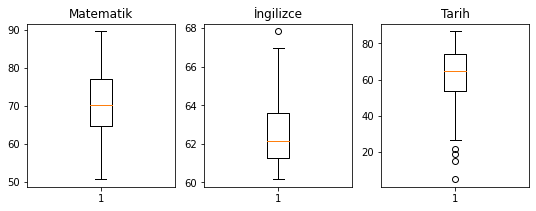

In [33]:
plt.figure(figsize = (9,3))

plt.subplot(131)
plt.boxplot(df.Matematik)
plt.title("Matematik")

plt.subplot(132)
plt.boxplot(df.İngilizce)
plt.title("İngilizce")

plt.subplot(133)
plt.boxplot(df.Tarih)
plt.title("Tarih")

plt.show()

Box plotlarda ilk başta gözümüze çarpan **matematik dersinin normal bir dağılım izlenimi** vermesi. Bunun yanı sıra **ingilizce ve tarih dersleri için küçük dairelerden görüldüğü şekilde aykırı (outlier) değerlerin** oluştuğunu görebiliriz.

Box plot, aynı anda birden fazla değişkenin dağılımını görselleştirmek için harika bir yoldur, ancak genişlik / noktasallıktaki sapmayı bu görselleştirmeyi kullanarak belirlemek zordur.

---

### c.Kernel Density Estimation (KDE)
KDE, verilerden tahmin edilen bir histogramın doğrusal anlamda düzenleştirilmiş haldir. Bu yöntemde, her bir veri noktasında sürekli bir eğri (çekirdek/kernel) çizilir ve daha sonra tüm bu eğriler, tek bir düzgün yoğunluk tahmini yapmak için birbirine eklenir.

Örnek veri setinden yola çıkarak KDE görselleştirmesini yaparak dağılıma bir bakalım. Pandas kütüphanesi içerisinde KDE grafiğini çizdirebilmekteyiz.

<AxesSubplot:ylabel='Density'>

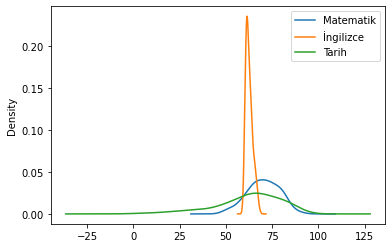

In [34]:
df.plot.kde()

KDE grafiğini incelediğimiz zaman değişkenlerin arasındaki dağılım gözlemlemek için benzer aralıklarda olmadığından dolayı üç ders için değerleri normalize edip yeniden bakalım.

<AxesSubplot:ylabel='Density'>

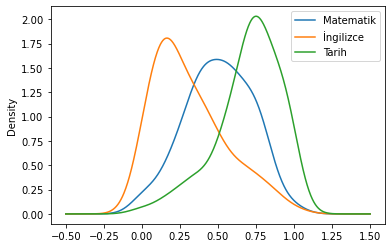

In [35]:
# Normalizasyon fonksiyonu
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Değişkenleri normalize ediyoruz.
normal = normalize(df)

# KDE plotu yeniden çizdiriyoruz.
normal.plot.kde()

Tüm değişkenleri aynı ölçütte değerlendirebileceğimiz bir formata getirdiğimize göre dağılım farklılıklarını daha iyi gözlemleyebiliriz. Yine **matematik için normal bir dağılım** görülürken **ingilizce ve tarih dersleri için bir çarpıklığın (sağa/sola yatık)** olduğu görülmektedir.

---

### d. Q-Q Plot

QQ (quantile-quantile) grafiği, verilerin normal dağılımın durumunu teorik niceliğiyle karşılaştırmanın efektif bir yoludur. **Veriler merkez hatta (line) ne kadar yakınsa, verilerin yayılımı normal dağılıma o kadar yakın demektir.**

Not: Bu grafiğin çizimi için statsmodel kütüphanesinde yer alan qqplot metodundan yararlanılmıştır.

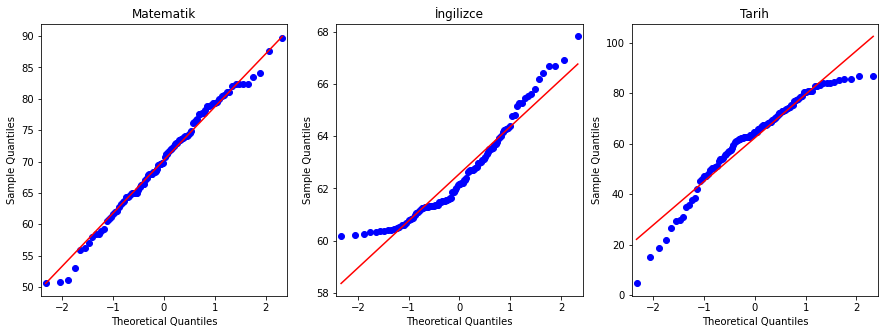

In [36]:
# 3 QQ grafiği tek alanda çizdiriyoruz
import statsmodels.api as sm
fig, (ax, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 5))

sm.qqplot(df.Matematik, line = "s", ax = ax)
ax.set_title("Matematik")

sm.qqplot(df.İngilizce, line = "s", ax = ax2)
ax2.set_title("İngilizce")

sm.qqplot(df.Tarih, line = "s", ax = ax3)
ax3.set_title("Tarih")

plt.show()

Matematik notlarına ait verilerin normal dağıldığını diğer grafiklerde zaten görmüştük. QQ grafiğinde ise bir çizgiye oturmuş olarak bu dağılımın normalliğini tekrardan görüyoruz. Aynı şekilde diğer iki ders için çizginin dışına taşan sapmalar mevcut

---

### e. Violin Plot

Violin (keman) grafiği verilerin dağılımını ve olasılık yoğunluğunu görselleştirmek için en efektif yöntemlerden birisidir.

Violin grafiği box plot ve KDE’nin kombinasyonundan doğmuştur. Box plot, görsel basitliği ve verilerdeki değerlerin nasıl dağıldığına ilişkin önemli ayrıntıları gizleme eğiliminde olduğundan, değişken değerlerinin dağılımının gösterilmesinde sınırları bulunmaktadır.

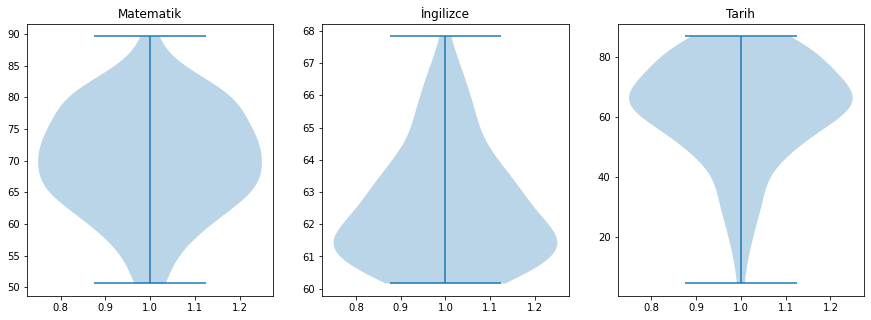

In [37]:
# 3 violin grafiği tek alanda çizdiriyoruz
fig, (ax, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 5))

ax.violinplot(df.Matematik)
ax.set_title("Matematik")

ax2.violinplot(df.İngilizce)
ax2.set_title("İngilizce")

ax3.violinplot(df.Tarih)
ax3.set_title("Tarih")

plt.show()

Yukarıdaki her bir değişken için çizdirilen violin plotlarda verilerin hangi aralığa doğru dağıldığını ve nerelerde dengesizlik olduğunu açıkça yansıtmaktadır.

---

## 3.Normal Dağılımın Testi ve Yorumlanması 

#### Basıklık (Kurtosis) ve Çarpıklık (Skewness)


Skewness, normal dağılımı bir çan eğrisi olarak düşündüğünüzde çanın tepe noktasının sağa mı yoksa sola doğru mu çarpıklığı olduğunu göstermektedir. Kurtosis ise çanın basık mı yoksa yüksek mi olduğunu veren değeri bize göstermektedir.

In [40]:
# Skewness ve kurtosis değerleri
m = df.Matematik
i = df.İngilizce
t = df.Tarih
print("Matematik")
print(f"Skewness: {stats.skew(m)} Kurtosis: {stats.kurtosis(m)}")
print("İngilizce")
print(f"Skewness: {stats.skew(i)} Kurtosis: {stats.kurtosis(i)}")
print("Tarih")
print(f"Skewness: {stats.skew(t)} Kurtosis: {stats.kurtosis(t)}")

Matematik
Skewness: -0.18240961883219445 Kurtosis: -0.4462956811237584
İngilizce
Skewness: 0.8389518711338784 Kurtosis: -0.036290897752046636
Tarih
Skewness: -0.9709256918774571 Kurtosis: 0.8100780189641474


Sonuçları incelediğimizde en çarpık olmayan değişken Matematik iken basıklık düzeyi diğerlerine nispeten daha duran ders ise Tarihtir. Skewness değerlerinin pozitif ya da negatif yönelimli olması onun hangi tarafa doğru bir çarpıklığının olduğu göstermektedir. Aynı şekilde kurtosis için 0'ın üzeri çan eğrisinin yukarı doğru yükselmesi 0'ın altı ise aşağıya doğru basıklığın olduğunu göstermektedir.

Normal dağılım sınaması için Shapiro-Wilk ve Kolmogorov-Smirnov en yaygın olarak kullanılan testler olup temelde hipotezleri aynıdır

**H0:** Değişken normal dağılıma sahiptir. p-value > 0.05

**H1:** Değişken normal dağılıma sahip değildir. p-value < 0.05

**Shapiro-Wilk Testi**

Uygulamada, Shapiro-Wilk testinin güvenilir bir normallik testi olduğuna inanılır, ancak testin daha küçük veri örnekleri için (x < 1000) uygun olabileceğine dair bazı araştırmalar mevcuttur.

In [42]:
# Shapiro - Wilk testi
m = df.Matematik
i = df.İngilizce
t = df.Tarih
print("Matematik")
print(f"T: {stats.shapiro(m)[0]} P-Value: {stats.shapiro(m)[1]}")
print("İngilizce")
print(f"T: {stats.shapiro(i)[0]} P-Value: {stats.shapiro(i)[1]}")
print("Tarih")
print(f"T: {stats.shapiro(t)[0]} P-Value: {stats.shapiro(t)[1]}")

# # shapiro-wilk normallik testi
# for i in df.columns:
#     _, p = stats.shapiro(df[i])
#     print(f"{i}: {round(p,4)}")


Matematik
T: 0.9885590076446533 P-Value: 0.5502902269363403
İngilizce
T: 0.9253531694412231 P-Value: 2.7382229745853692e-05
Tarih
T: 0.9325659871101379 P-Value: 6.980002945056185e-05


Her bir değişken için sonuçları incelerken hipotez reddi/kabülu için **p-value’ya** bakmamız yeterlidir. Buna göre;

 * **Matematik** değişkenine ait **p-value değeri > 0.5503** olduğuna göre **H0 hipotezini kabul etmiş oluyoruz**. Dolayısıyla değişken **normal bir dağılım** göstermektedir.
 
 
 * İngilizce ve Tarih değişkenleri için p-value < 0,05 olduğu için H0 hipotezini reddediyoruz. Dolayısıyla bu değişkenler normal bir dağılım göstermemektedir.

**Kolmogorov-Smirnov**

Shapiro-Wilk testi, normalliği belirlemek için popülerdir ve genellikle çok iyi performans gösterir, ancak evrensel olarak en iyisi değildir. Bir değişkeni incelerken tek bir teste bağlı kalmadan sonuçlarınızı doğrulamak için ek yöntemler kullanmanız gerekir. Bunun için Kolmagorov-Smirnov testi uygulanabilir.

In [43]:
# Kolmogorov–Smirnov test
m = df.Matematik
i = df.İngilizce
t = df.Tarih

m_kstest = stats.kstest(m, 'norm',
                         args=(m.mean(),
                               m.std()))
i_kstest = stats.kstest(i, 'norm',
                         args=(i.mean(),
                               i.std()))
t_kstest = stats.kstest(t, 'norm',
                         args=(t.mean(),
                               t.std()))
print("Matematik")
print(f"T: {m_kstest[0]} P-Value: {m_kstest[1]}")
print("İngilizce")
print(f"T: {i_kstest[0]} P-Value: {i_kstest[1]}")
print("Tarih")
print(f"T: {t_kstest[0]} P-Value: {t_kstest[1]}")

Matematik
T: 0.05337879936336476 P-Value: 0.9235198976848957
İngilizce
T: 0.13577501961454552 P-Value: 0.04542252879369313
Tarih
T: 0.12309474596193415 P-Value: 0.0886332626550953


Kolmogorov-Smirnov, bir değişkenin dağılımını, kümülatif dağılım fonksiyonu (cumulative distribution function - CDF) yardımı ile normal dağılıma uyup uymadığını test eder. Veya, iki farklı değişken arasındaki ilişki CDF üzerinden test edilir. Bizim örneğimizde değişkenleri kendi içinde değerlendirdiğimiz için karşısına koyacağımız parametre olarak o değişkene ait ortalama ve standart sapma değerlerini formüle ekledik. Yukarıdaki stats.kstest ve ks.test içerisinde yer alan ortalama (mean) ve standart (std/sd) sapma değerleri buradan gelmektedir.

* Matematik değişkeni için H0 hipotezi kabul edilmiştir (p-value > 0.05). Dolayısı ile değişkenin normal bir dağılım gösterdiği söylenebilir.

* İngilizce değişkeni sınırın altında (0.045) kaldığı için H0 hipotezini reddedebiliriz (p-value < 0.05). Dolayısıyla değişkenin normal bir dağılım göstermediği söylenebilir.

* Tarih değişkeni Kolmogorov–Smirno testinde Shapiro-Wilk testine göre farklı bir sonuç çıkarmıştır. yapılan testlerin sonucu  olarak p-value > 0.05 olup H0 hipotezi kabul edilmiştir. Dolayısıyla bu değişken için normal dağılım gösteriyor diyebiliriz.

---

## 4. Normal Dağılmayan Verilerin Dönüştürülmesi

Veri biliminde parametrik testlerin uygulanabilirliği için normal dağılım varsayımı önemlidir. Bir değişkenin normal dağılım göstermemesi durumunda çeşitli veri dönüştürme (transformation) teknikleri bulunmaktadır. Bu yöntemler ile değişkenin dağılımını normale yaklaştırmak mümkün hale gelebilmektedir.

Shapiro-Wilk Testin de İngilizce ve Tarih derslerinin normal bir dağılıma uymadığını görmüştük. 

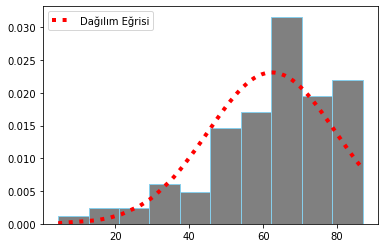

In [44]:
# Tarih değişkenin sıralanıp
# tek değişkene tanıtılması
tarih = df.Tarih.sort_values()

# dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# Histogram ve dağılım eğrisi
plt.hist(tarih, bins='auto', density = True
         ,color = "grey", ec="skyblue")

plt.plot(tarih, pdf_norm, label='Dağılım Eğrisi'
         ,color = "red", linewidth=4, linestyle=':')

plt.legend()
plt.show()

Histogramda görüldüğü üzere Tarih dersine ait veriler çarpık (skew) olarak dağılmaktadır. Değişkeni daha normal bir dağılıma dönüştürmek için aşağıdaki teknikleri uygulayabiliriz.


---

**1. Logaritmik Dönüşüm (Log Transformation)**

Log dönüşümünde, x’in her değeri log (x) ile 10 tabanı, 2 tabanı veya doğal log ile değiştirilebilir.

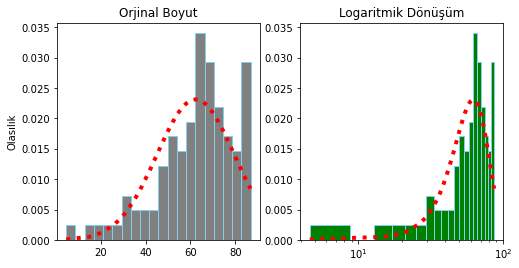

In [46]:
# Orjinal değişken
tarih = df.Tarih.sort_values()
# dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# logaritmik dağılım eğrisi
shape, loc, scale = stats.lognorm.fit(tarih, loc=0)
pdf_lognorm = stats.lognorm.pdf(tarih, shape, loc, scale)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Orjinal dağılıma göre log dönüşüm
ax2.hist(tarih, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih, pdf_lognorm
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_xscale('log')
ax2.set_title('Logaritmik Dönüşüm')
plt.show()

Yukarıdaki grafikler orijinal ve Logaritmik dönüşüm verilerinin karşılaştırılmasını göstermektedir. Burada, dönüştürülen verilerde çarpıklığın azaldığını görüyoruz (en iyi çarpıklık değeri sıfıra yakın olmalıdır).

---

**2. Karekök Dönüşümü (Square-Root Transformation)**

Bu dönüşüm, dağıtım üzerinde ılımlı bir etki sağlamaktadır. Karekök dönüşümünün temel avantajı sıfır değerlerine uygulanabilmesidir.
Burada X değeri için, karekök (X) ile değiştirilir. Logaritmik dönüşüme göre daha zayıf bir etkisi bulunmaktadır.

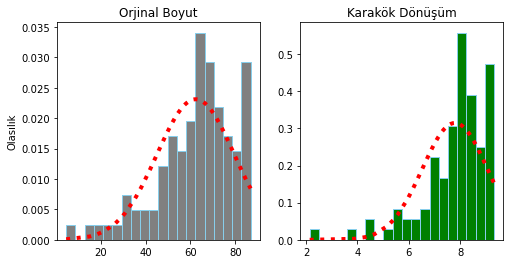

In [47]:
# Orjinal değişken
tarih = df.Tarih.sort_values()

# karakök alınmış hali
tarih_sr = tarih ** (1/2)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)


# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# karakök dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_title('Karakök Dönüşüm')
plt.show()

---

**3. Karşıt Dönüşüm (Reciprocal Transformation)**

Bu dönüşümde X değeri için X’in tersiyle (1 / X) değiştirilecektir.
Karşılıklı dönüşüm, dağılımın şekli üzerinde çok az etki sağlayacaktır. Bu dönüşüm yalnızca sıfır olmayan değerler için kullanılabilir.

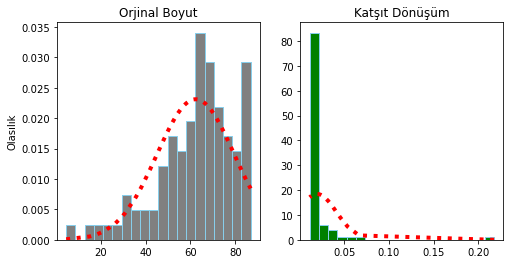

In [48]:
# Orjinal değişken
tarih = df.Tarih.sort_values()

# tersine döndürülmüş hali
tarih_sr = 1 / tarih

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Karşıt dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

# ax2.set_xscale('Karakök')
ax2.set_title('Katşıt Dönüşüm')
plt.show()

Grafiklerde de görüldüğü üzere çokta etkili görülmeyen bir dönüşüm yöntemidir. Ancak spesifik modellerde bazı input değerler üzerinde denenebilir.

---

**4. Box-Cox Dönüşümü**

Box-Cox dönüşümü, çarpık veriler üzerinde oldukça düzeltici etkilesi olduğu bilinen istatistiksel bir tekniktir. Fonksiyon, normal olmayan dağılımı normal dağılıma dönüştürme türünü lambda (λ) parametresine göre belirlemektedir. Box-Cox için lambda (λ) parametresi -5 <λ <5 aralığına sahiptir. Lambanın aldığı değerler ve karşısındaki dönüşüm türü aşağıdaki gibidir.

* lambda = -1 Karşıt (Reciprocal) Dönüşüm
* lambda = -0.5 Karşıt Karekök Dönüşümü
* lambda = 0.0 Logaritmik Dönüşüm
* lambda = 0.5 Karekök Dönüşümü
* lambda = 1.0 Dönüşüm Yok

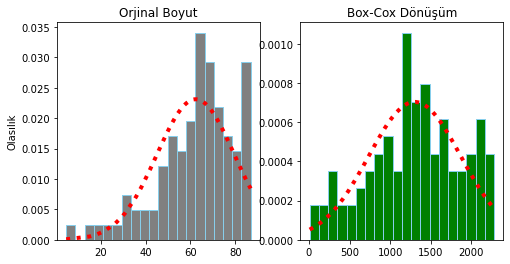

In [49]:
# Orjinal değişken
tarih = df.Tarih.sort_values()

# tersine döndürülmüş hali
tarih_sr, lam = stats.boxcox(tarih)

# orjinal dağılım eğrisi
mean, std = stats.norm.fit(tarih, loc=0)
pdf_norm = stats.norm.pdf(tarih, mean, std)

# Box-Cox dağılım eğrisi
mean, std = stats.norm.fit(tarih_sr, loc=0)
pdf_norm_sk = stats.norm.pdf(tarih_sr, mean, std)

# Grafikler
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Orjinal veriler ve dağılımı
ax1.hist(tarih, bins= 20 , density=True
         ,color = "grey", ec= "skyblue")

ax1.plot(tarih, pdf_norm
         ,color = "red", linewidth=4, linestyle=':')

ax1.set_ylabel('Olasılık')
ax1.set_title('Orjinal Boyut')

# Box-Cox dönüşüm grafiği
ax2.hist(tarih_sr, bins= 20, density=True
         ,color = "green", ec="skyblue")

ax2.plot(tarih_sr, pdf_norm_sk
         ,color = "red", linewidth=4, linestyle=':')

ax2.set_title('Box-Cox Dönüşüm')
plt.show()

Grafiklerden de görüleceği üzere Box-Cox yöntemine sahip olan dağılımın normalleştiği gözle görülür bir şekilde belirginleşmiştir.

---

**KTS Projesinde Normalleştirme ile ilgili tutulan notlar:**

### Normalleştirmeye Giriş

Normalleştirme verilere uygulanan bir ön işleme aşamasıdır. Pek çok makine öğrenmesi yöntemi normalleştirilmiş veri üzerinde çalıştığında en iyi sonuçları verir ve bu algoritmaların tasarımında verilerin Gauss dağılımı ile dağıldıklarını varsayar.

Bunun için verilerin problemlerinin giderilip dağılımlarına göre uygun dönüşümün yapılıp normalleştirilmeleri gereklidir.

#### Kategorik Verilerin Normalleştirilmesi

Kategorik veriler makine öğrenmesi algoritmalarına verilmeden önce onların kullanabileceği bir hale dönüştürülmesi gerekir. Kategorik verilerde karşılaşılan en yaygın problem kategori sayısı çok olduğunda bunların anlamlandırılmasının ve işlenmesinin doğurduğu zorluklardır.

* Karar ağacı temelli algoritmalar genellikle kategorik verileri doğrudan işleyebilirler.

* Diğer pek çok algoritma üzerlerinde sayısal işlem yapılması gerekli olduğundan verilerin bir sıcak kodlamasına göre standartlaştırılmasını gerektirir. Bu işle için veriye kategori sayı kadar  sütün eklenir ve özelliğin olduğu satıra 1 diğerlerine 0 yazılır. Bu işlem veriyi sadece nümerik algoritmaların çalışmasına uygun hale getirir.

* Kategori sayısı çok olan özelliklerin hedef kodlaması yöntemi ile normalleştirilmesi mümkündür. Bunun için her kategori türü için hedef özellik ortalaması hesaplanır bu işlem önceki kodumuzda factorization şeklinde tarif edilmiştir.

* Kodlama metodu ise her bir kategori değerinin öğrenilen nümerik bir değerle değiştirilmesi sonucunda elde edilir. Bu metod nöral ağlar gibi türevlenebilir algoritmaların eğitimlerinde kullanılan bir yöntemdir ve çok sayıda kategorinin manalı ilişkilerinin öğrenilmesini sağlar.

* Eğer kategorik veriler bir aralığı ifade ediyorlarsa mesela yaşı temsil eden bir kategori aralıklara göre bölünmüşse bu değerlerin ortalama, medyan, maksimum, minimum gigi değerlerle sayısallaştırılabilir.

* Kategorik değerlerin manaları biliniyorsa bunlarla ilgili bir dönüşüm işlemi uygulanabilir. Örneğin posta kodunu gösteren bir özellik ona bağlı il ismi ya da o bölgenin koordinatları ile değiştirilebilir. Bu sayede kategori sayısı azaltılabilir ya da işlem sayısallaştırılabilir.


#### Sayısal Verilerin Normalleştirilmesi

Sayısal veriler de makine öğrenmesi algoritmalarına verilmeden önce farklı yöntemlerle normalleştirilir. Bu işlemler yapılmadan doğru istatistikleri hesaplayabilmek için verilerdeki extrem, eksik ya da 0 verilerin çıkartılması gerekir. Bunun akabinde verinin türü ve dağılımına göre şu yöntemlerden biri uygulanır:

* Z-score: Bu yöntemde veriden ortalaması çıkarılıp standart sapmasına bölünür. Bu yöntem en yaygın yöntemdir ve Gauss dağılımı ile dağılan verilerin işlenmesinde kullanır.

* Scaling (ölçekleme): Bu yöntemde veri 0 ile 1 arasına minimumunun çıkarılıp maxsimum minimum farkına bölünmesiyle gerçekleştirilir. Bu yöntem verinin belli bir aralıkta olması gereken metotlarda kullanılır.

* Power-transform: Bu metot exponantiel (üstel) dağılım gösteren verilerin normalleştirilmesinde kullanılır. Yaygın olarak box-cox metodu kullanılarak yapılır.



---